In [1]:
# Name : Dhihan Ahmed, Luke Bianchi, Jacob Gurevich
# Assignment Number & Name : EDA - NHL Win Classification (With Event-Level Features)
# I pledge my honor that I have abided by the Stevens Honor System.

In [2]:
%pip install seaborn

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [4]:
# Load the enhanced dataset with shot-level features
df = pd.read_csv('merged_with_event_features.csv')

# Drop rows with missing essential values
df.dropna(subset=['won', 'shots', 'hits', 'pim', 'powerPlayGoals', 
                  'faceOffWinPercentage', 'giveaways', 'takeaways', 'blocked'], inplace=True)
df['is_home'] = df['HoA'].map({'home': 1, 'away': 0})
# Convert 'won' to binary integer
df['won'] = df['won'].astype(int)

# Display first few rows
df.head()

,game_id,team_id,HoA,won,settled_in,head_coach,goals,shots,hits,pim,...,blocked,startRinkSide,avg_shot_x,avg_shot_y,close_range,num_wrist_shot,num_backhand,num_slap_shot,num_tip-in,is_home
0,2016020045,4,away,0,REG,Dave Hakstol,4.0,27.0,30.0,6.0,...,11.0,left,17.962963,-5.296296,0.0,18.0,3.0,3.0,2.0,0
1,2016020045,16,home,1,REG,Joel Quenneville,7.0,28.0,20.0,8.0,...,9.0,left,-10.392857,-2.857143,0.0,16.0,3.0,7.0,0.0,1
2,2017020812,24,away,1,OT,Randy Carlyle,4.0,34.0,16.0,6.0,...,14.0,right,-9.647059,-4.088235,1.0,16.0,6.0,6.0,3.0,0
3,2017020812,7,home,0,OT,Phil Housley,3.0,33.0,17.0,8.0,...,14.0,right,46.000000,0.636364,0.0,20.0,3.0,3.0,2.0,1
4,2015020314,21,away,1,REG,Patrick Roy,4.0,29.0,17.0,9.0,...,20.0,left,30.000000,-0.413793,2.0,16.0,3.0,3.0,0.0,0


In [5]:
# Show descriptive statistics of numeric columns
print(df.describe())

            game_id       team_id           won         goals         shots  \
count  2.532200e+04  25322.000000  25322.000000  25322.000000  25322.000000   
mean   2.014606e+09     17.620646      0.499605      2.762381     30.462997   
std    2.868253e+06     12.264714      0.500010      1.647255      6.884744   
min    2.010020e+09      1.000000      0.000000      0.000000      0.000000   
25%    2.012021e+09      8.000000      0.000000      2.000000     26.000000   
50%    2.015020e+09     16.000000      0.000000      3.000000     30.000000   
75%    2.017021e+09     24.000000      1.000000      4.000000     35.000000   
max    2.019041e+09     90.000000      1.000000     10.000000     88.000000   

               hits           pim  powerPlayOpportunities  powerPlayGoals  \
count  25322.000000  25322.000000             25322.00000    25322.000000   
mean      23.542453     10.014454                 3.16148        0.592449   
std        8.717832      7.908557                 1.55637

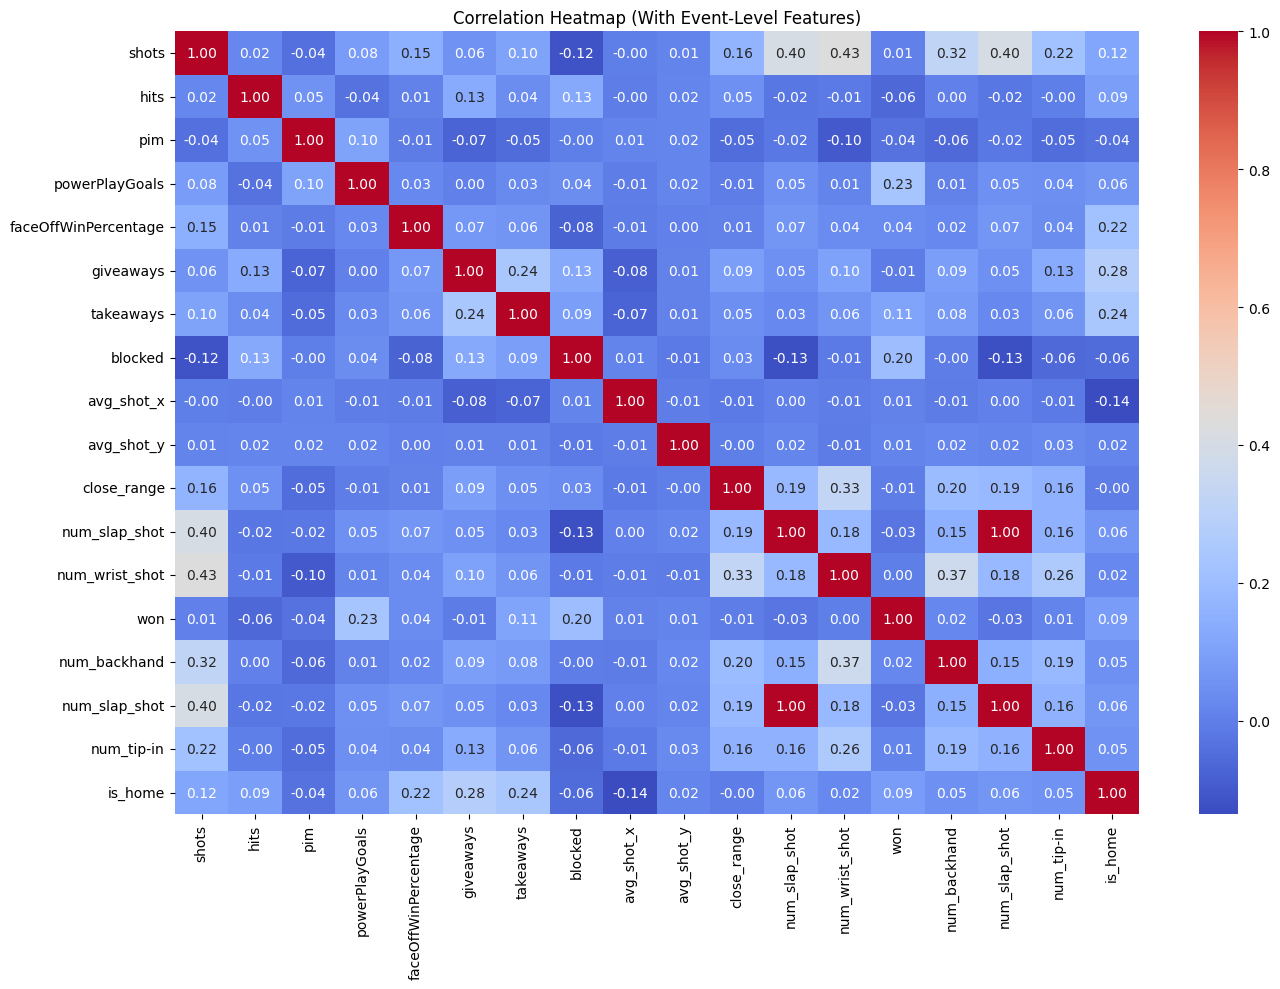

In [6]:
# Correlation heatmap with event-level features


# Define feature list
features = ['shots', 'hits', 'pim', 'powerPlayGoals', 'faceOffWinPercentage',
            'giveaways', 'takeaways', 'blocked', 'avg_shot_x', 'avg_shot_y',
            'close_range', 'num_slap_shot', 'num_wrist_shot', 'won', 'num_backhand','num_slap_shot','num_tip-in', 'is_home']

numeric_only = df[features].select_dtypes(include='number')

plt.figure(figsize=(14, 10))
sns.heatmap(numeric_only.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap (With Event-Level Features)")
plt.tight_layout()
plt.show()

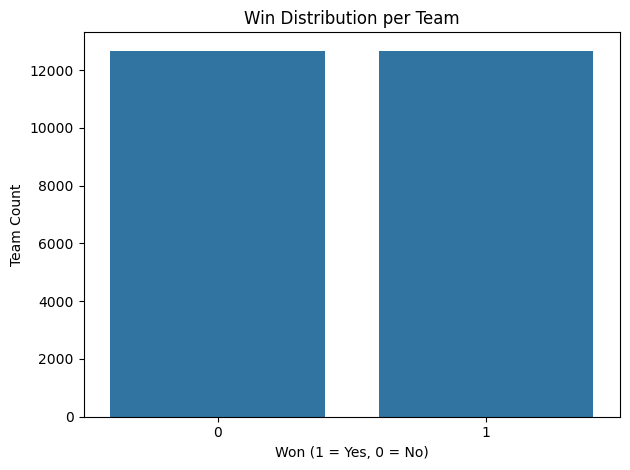

In [7]:
# Win distribution per team
sns.countplot(data=df, x='won')
plt.title("Win Distribution per Team")
plt.xlabel("Won (1 = Yes, 0 = No)")
plt.ylabel("Team Count")
plt.tight_layout()
plt.show()

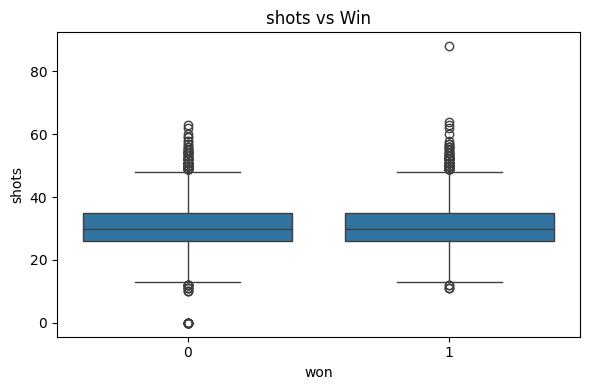

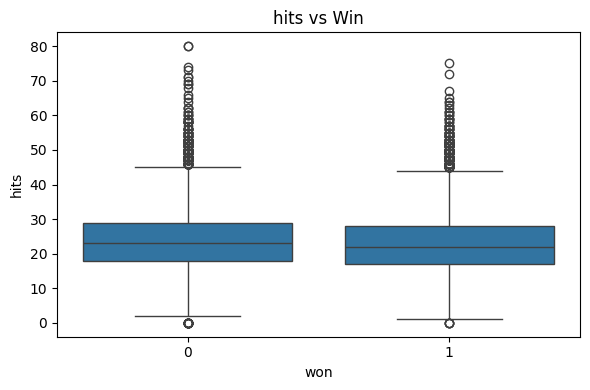

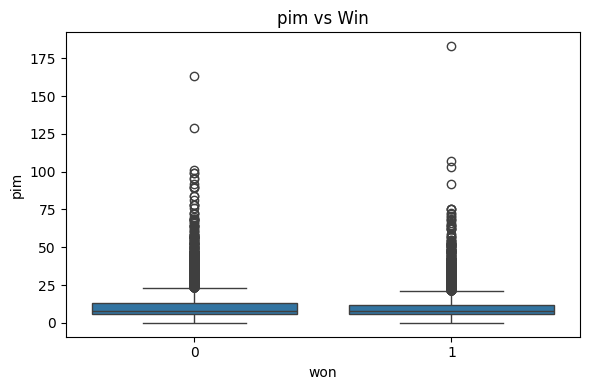

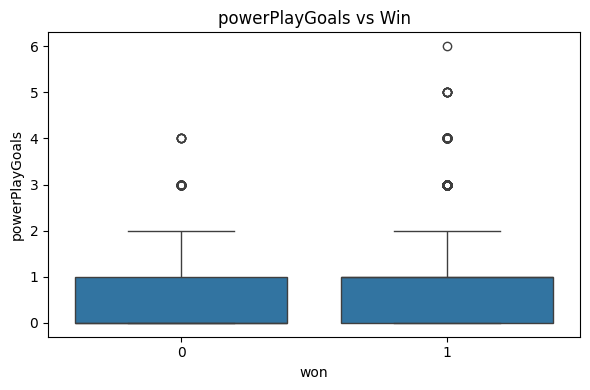

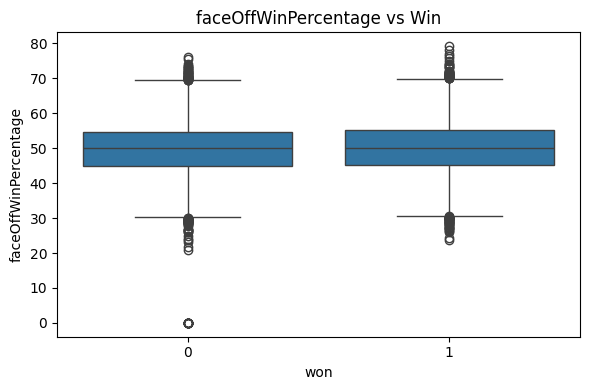

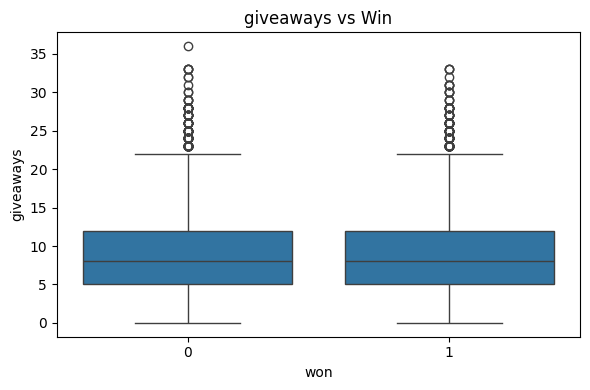

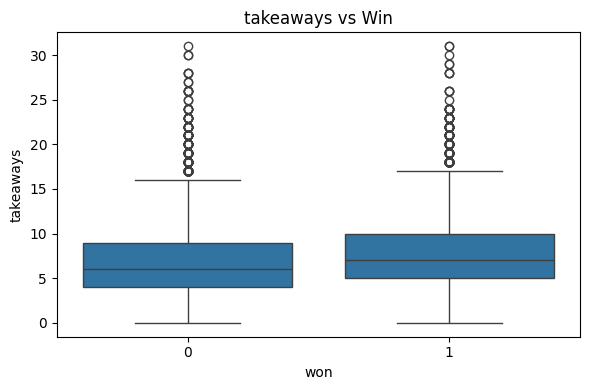

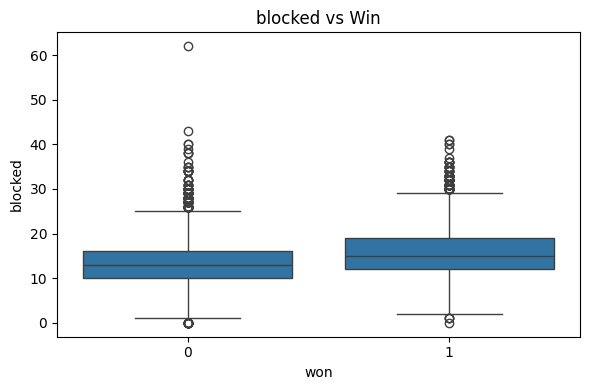

In [8]:
# Boxplots of core features vs win
features = ['shots', 'hits', 'pim', 'powerPlayGoals', 'faceOffWinPercentage',
            'giveaways', 'takeaways', 'blocked']
for f in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x='won', y=f)
    plt.title(f"{f} vs Win")
    plt.tight_layout()
    plt.show()

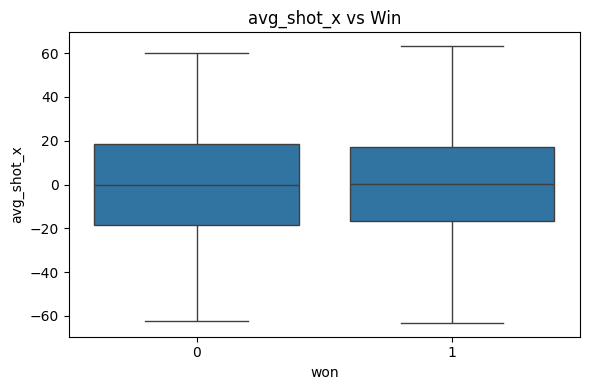

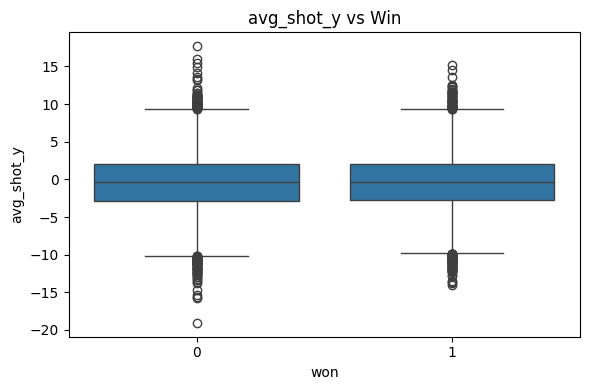

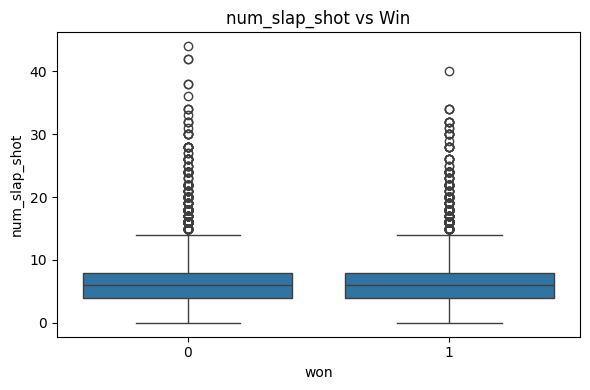

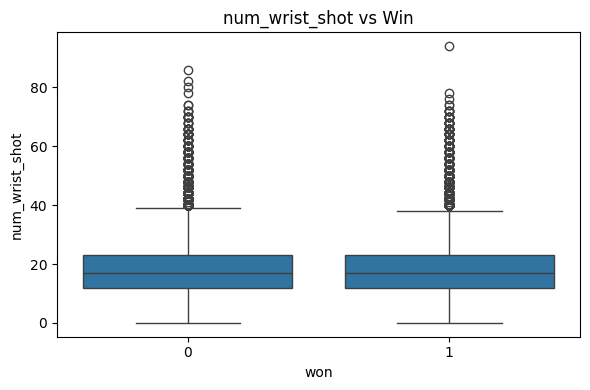

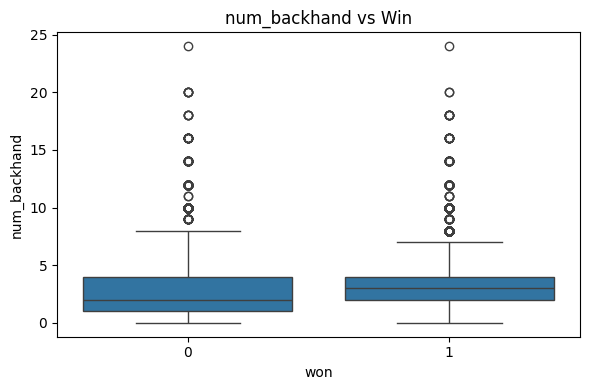

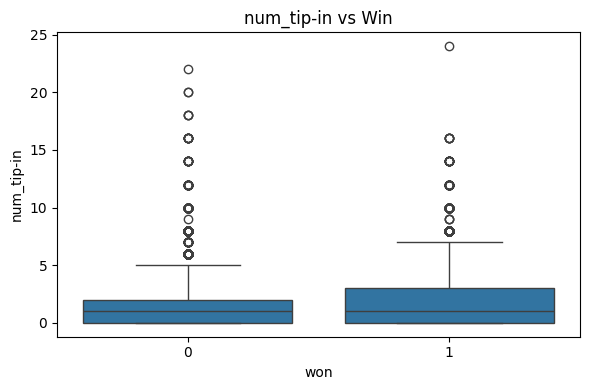

In [9]:
# Boxplots of shot features vs win
shot_features = ['avg_shot_x', 'avg_shot_y', 'num_close_range_shots',
                 'num_slap_shot', 'num_wrist_shot', 'num_backhand', 'num_tip-in']
for f in shot_features:
    if f in df.columns:
        plt.figure(figsize=(6, 4))
        sns.boxplot(data=df, x='won', y=f)
        plt.title(f"{f} vs Win")
        plt.tight_layout()
        plt.show()